In [16]:
import numpy as np
import pyJHTDB
from pyJHTDB.dbinfo import isotropic1024coarse as info


npoints = 2
nparticles = 2**5
nsteps = 32

x = np.zeros(shape = (npoints, nparticles, 3), dtype = np.float32)
x[..., 0] = info['lx']*np.random.random(size = (npoints,))[:, None]
x[..., 1] = info['ynodes'][info['ynodes'].shape[0]//2]
x[..., 2] = info['lz']*np.random.random(size = (npoints,))[:, None]

In [17]:
from pyJHTDB import libJHTDB
from pyJHTDB.dbinfo import interpolation_code

lJHTDB = libJHTDB()
lJHTDB.initialize()
t = info['time'][-1]  #final time
dt = info['time'][1] - info['time'][0] # this may be too big
xfull = np.zeros(shape = (nsteps+1, npoints, nparticles, 3),
                 dtype = np.float32)
xfull[0] = x
kappa = (2*info['nu'])**.5
for tindex in range(nsteps):
    print('step {0}'.format(tindex))
    # get velocity
    u = lJHTDB.getData(
                t,
                xfull[tindex],
                sinterp = interpolation_code['M2Q8'],
                tinterp = interpolation_code['NoTInt'],
                data_set = info['name'],
                getFunction = 'getVelocity')
    # Euler Maruyama
    dW = np.random.randn(*xfull.shape[1:])
    xfull[tindex+1] = xfull[tindex] - u*dt + kappa*dW
    t -= dt
lJHTDB.finalize()

step 0
step 1
step 2
step 3
step 4
step 5
step 6
step 7
step 8
step 9
step 10
step 11
step 12
step 13
step 14
step 15
step 16
step 17
step 18
step 19
step 20
step 21
step 22
step 23
step 24
step 25
step 26
step 27
step 28
step 29
step 30
step 31


<IPython.core.display.Javascript object>


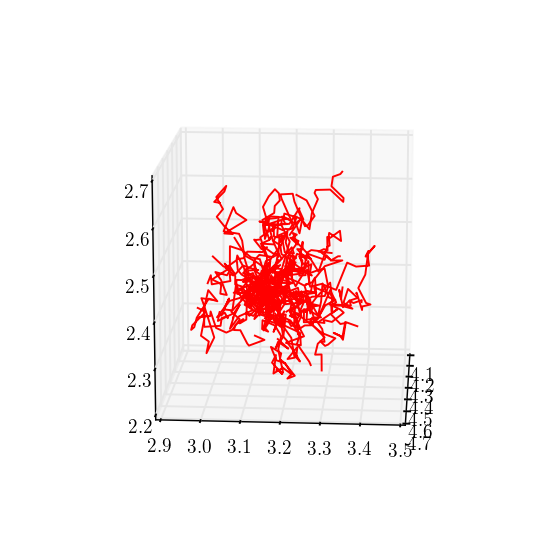

In [21]:
%matplotlib nbagg
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection = '3d')
for traj in range(xfull.shape[2]):
    ax.plot(xfull[:, 0, traj, 0],
            xfull[:, 0, traj, 1],
            xfull[:, 0, traj, 2],
            color = 'red')
#     ax.plot(xfull[:, 1, traj, 0],
#             xfull[:, 1, traj, 1],
#             xfull[:, 1, traj, 2],
#             color = 'blue')